In [ ]:
# This file is used to get threshold plots.
import seaborn as sns
import matplotlib.pyplot as plt
import sinter
from typing import List, Dict, Any
import sys
sys.path.append('..')
from plot_utils import estimate_threshold, plot_stats
%matplotlib inline

In [18]:
# File to load
file = "HBDbaseCZbiaspreservingThreshold/results.csv"
stats = sinter.read_stats_from_csv_files(file)
etas = [0.5,10,100,1000,10000]
logical_error_per_round = True

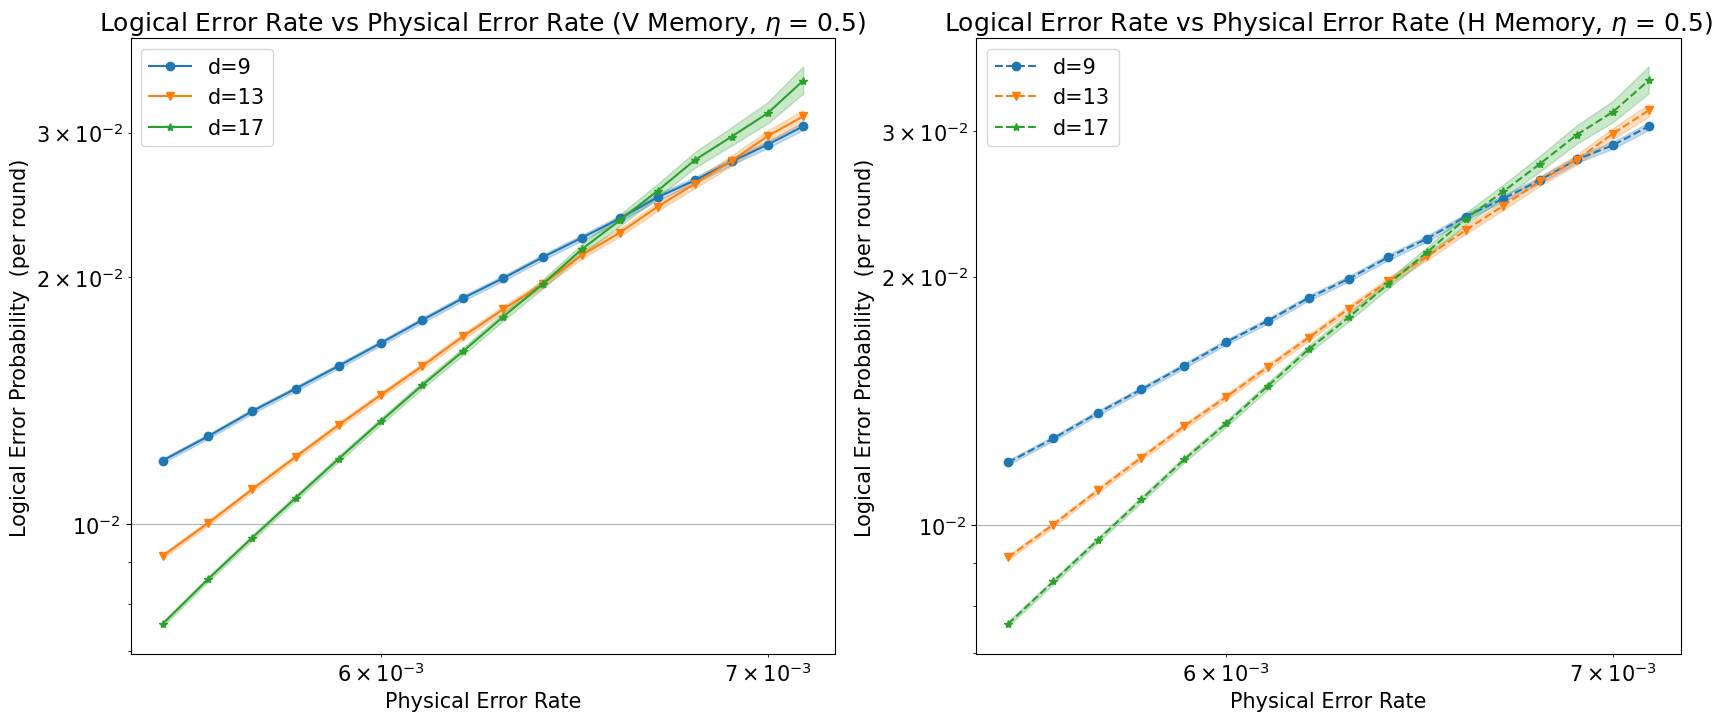

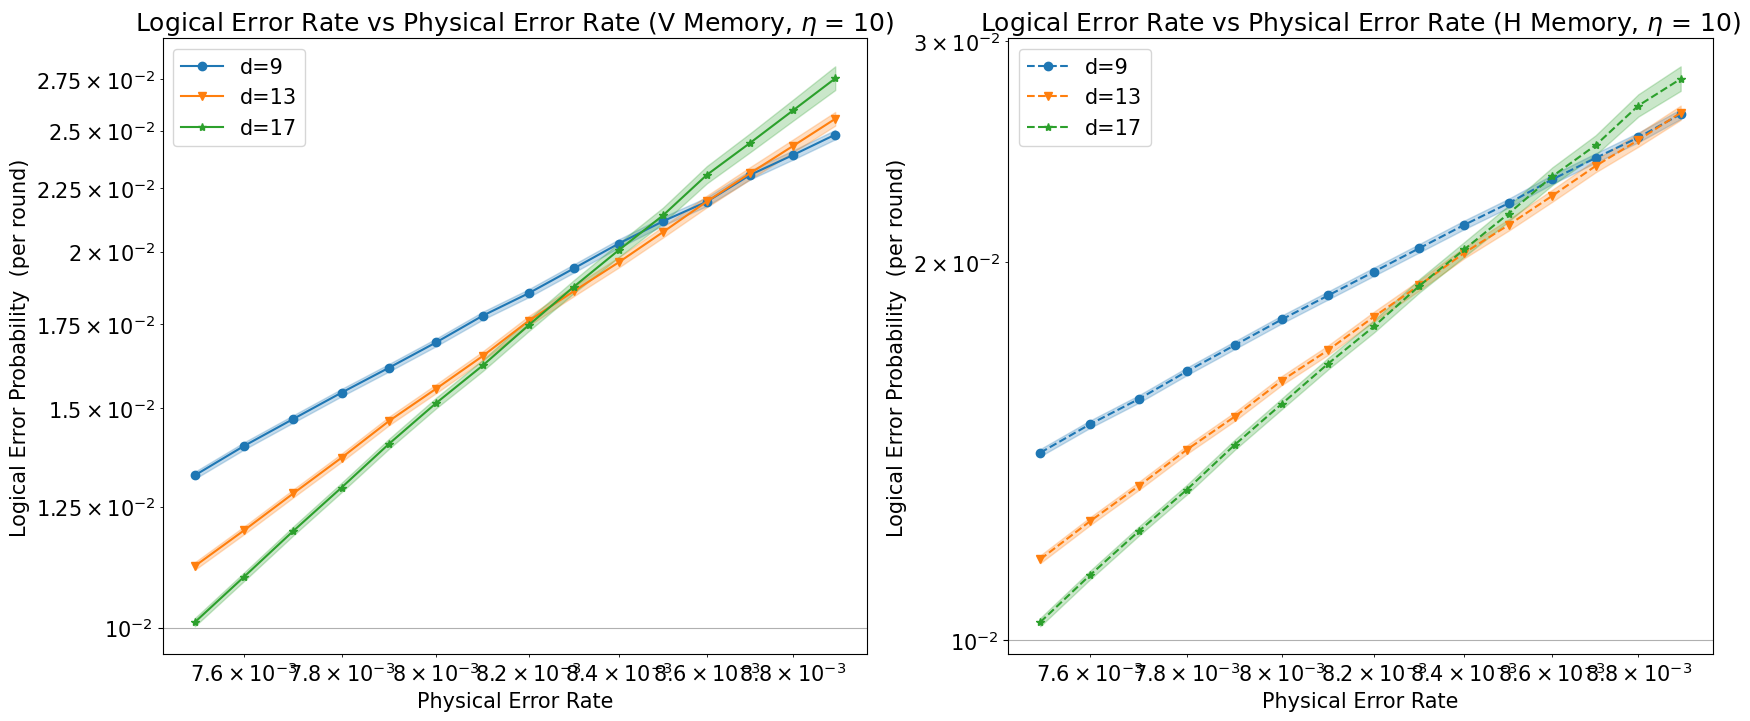

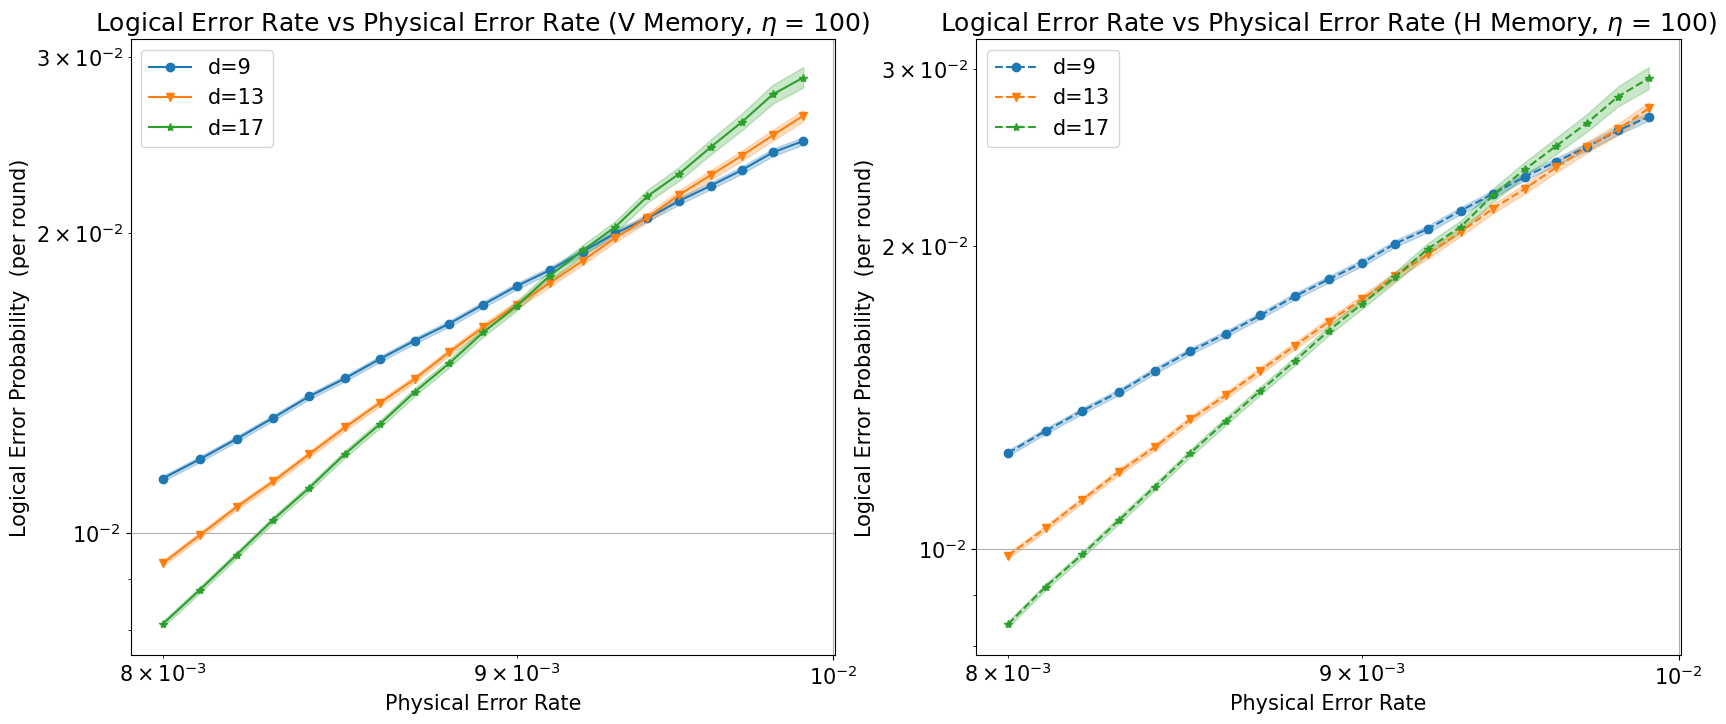

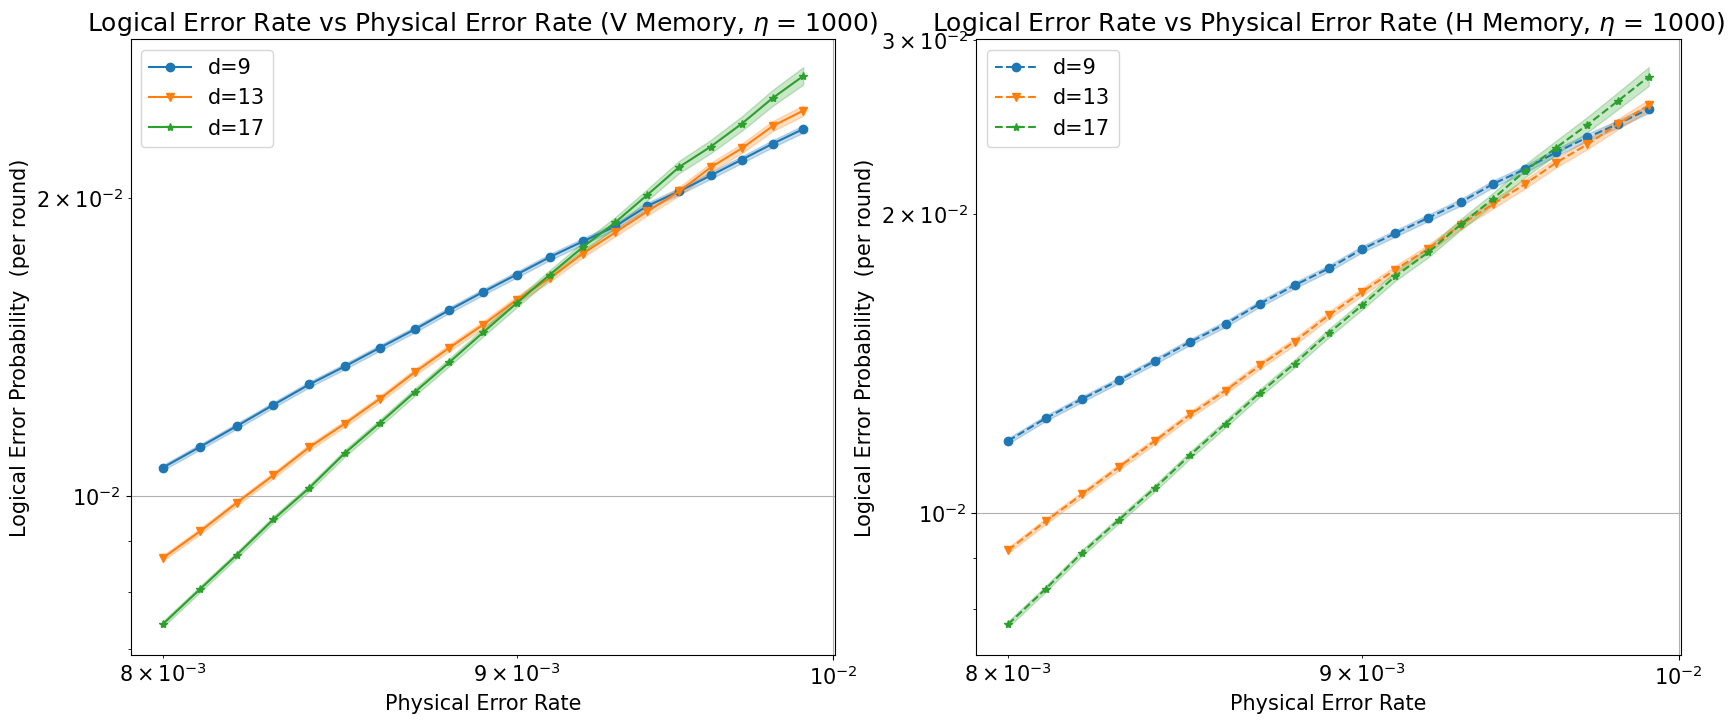

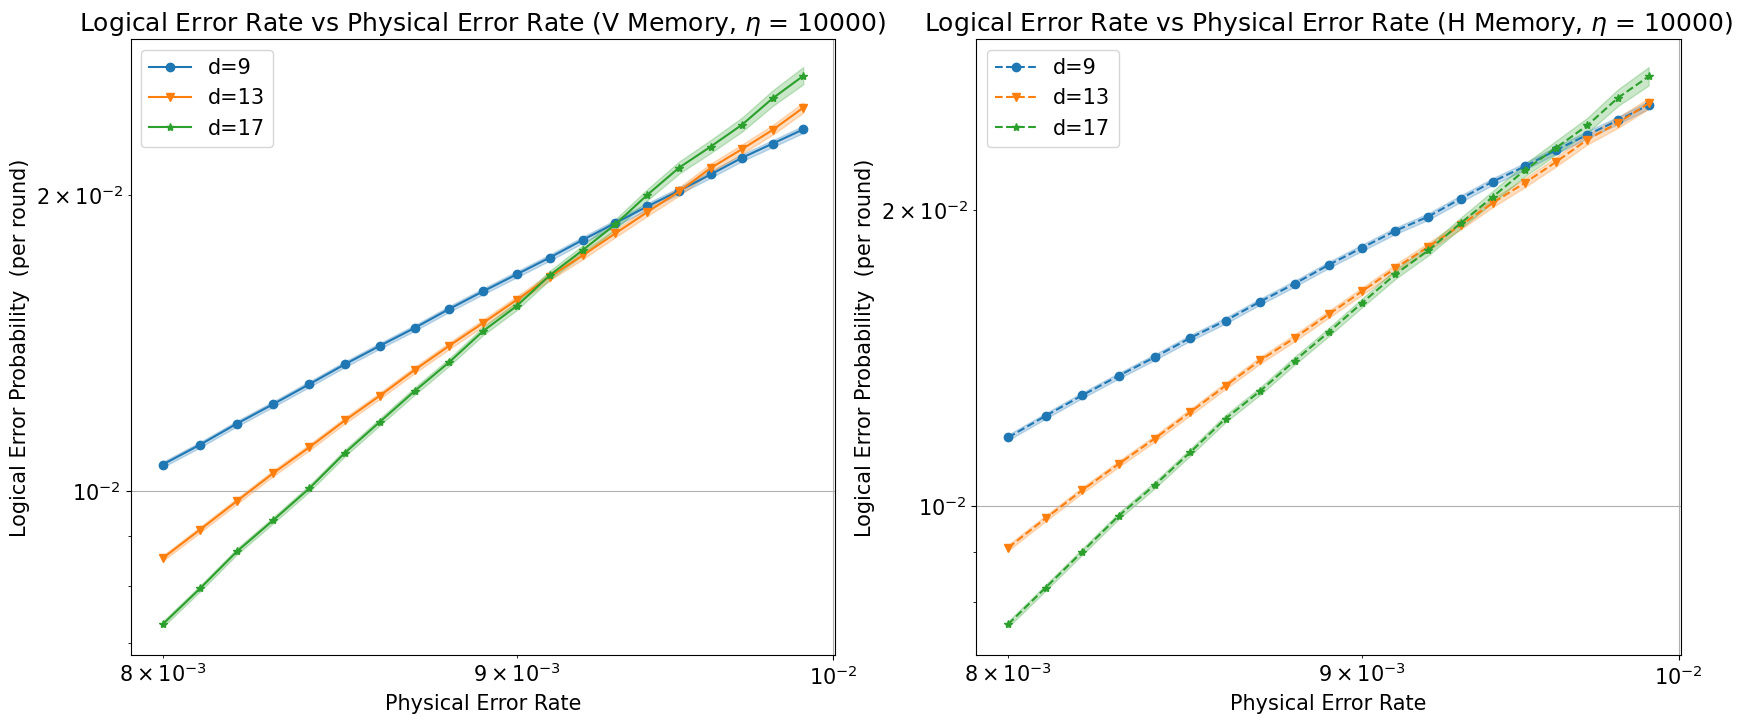

In [19]:
for eta in etas:
    stats_V = [stat for stat in stats if stat.json_metadata['memory'] == "V" and stat.json_metadata["eta"] == eta]
    stats_H = [stat for stat in stats if stat.json_metadata['memory'] == "H" and stat.json_metadata["eta"] == eta]

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    plot_stats(stats_V, ax=ax[0], logical_error_per_round=logical_error_per_round)
    plot_stats(stats_H, ax=ax[1], logical_error_per_round=logical_error_per_round)

    ax[0].set_title(f'Logical Error Rate vs Physical Error Rate (V Memory, $\eta$ = {eta})')
    ax[1].set_title(f'Logical Error Rate vs Physical Error Rate (H Memory, $\eta$ = {eta})')


## Estimate Thresholds

[(0.5, 0.0066, 0.0066), (10, 0.0085, 0.0086), (100, 0.0092, 0.0094), (1000, 0.0093, 0.0096), (10000, 0.0093, 0.0096)]


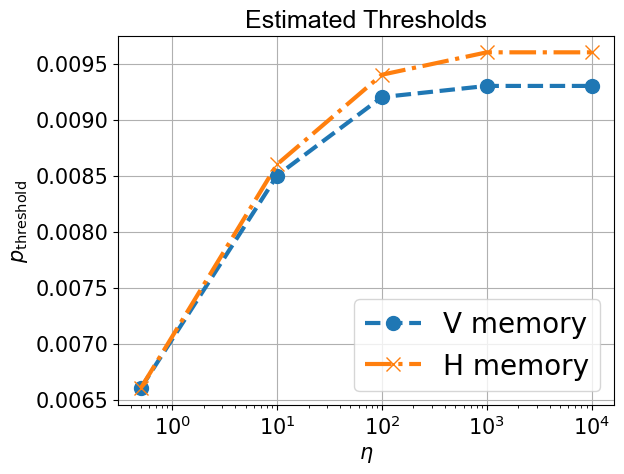

In [20]:
thresholds = []
for eta in etas:
    stats_V = [stat for stat in stats if stat.json_metadata['memory'] == "V" and stat.json_metadata["eta"] == eta]
    stats_H = [stat for stat in stats if stat.json_metadata['memory'] == "H" and stat.json_metadata["eta"] == eta]
    thresholds.append((eta,
                       estimate_threshold(stats_V, logical_error_per_round=logical_error_per_round),
                       estimate_threshold(stats_H, logical_error_per_round=logical_error_per_round)))

print(thresholds)

# Plot the estimated thresholds
fig, ax = plt.subplots(1, 1)
etas, V_thresholds, H_thresholds = zip(*thresholds)
ax.plot(etas, V_thresholds, "o--",linewidth=3, label='V memory', markersize=10)
ax.plot(etas, H_thresholds, "x-.",linewidth=3, label='H memory', markersize=10)

# Note that for the XZZX compiled only with CZ gates the memories are switched in the simulations
# because we get the first layer of Hadamard gates on the data qubits in the state preparation step,
# switching H by V. We will stick with the convention used in the text to define H and V memories
# as the pattern of the data qubits. Thus, to plot the results for such compilation, we change the names here.

# ax.plot(etas, H_thresholds, "o--",linewidth=3, label='V memory', markersize=10)
# ax.plot(etas, V_thresholds, "x-.",linewidth=3, label='H memory', markersize=10)


ax.set_xscale('log')
ax.set_title("Estimated Thresholds",fontname='Arial')
ax.set_xlabel(r"$\eta$",fontname='Arial')
ax.set_ylabel(r"$p_\mathrm{threshold}$",fontname='Arial')
ax.legend(prop={'size': 20})
ax.grid()
# ax.set_ylim([0.0064, 0.0095])
plt.rcParams.update({'font.size': 15})
# plt. savefig("ThreshOnlyCZ.pdf", format="pdf", bbox_inches="tight")
plt.show()


[1.32, 3.2, 4.72, 4.96, 5]


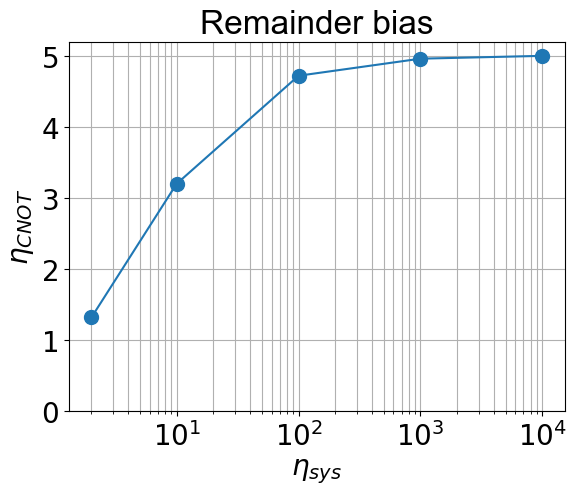

In [ ]:
# Reminder bias plot from Qtip simulation results
dist = [2, 10, 100, 1000, 10000]
qubs = [1.32, 3.2, 4.72, 4.96, 5]
print(qubs)

fig1, ax1 = plt.subplots(1, 1)

plt.plot(dist,qubs,'o-', markersize=10)


#plt.yscale("log")
plt.semilogx()
ax1.set_ylim(0, 5.2)
ax1.grid(which='major')
ax1.grid(which='minor')
#ax1.legend(prop={'size': 10})
ax1.set_title("Remainder bias",fontname='Arial')
ax1.set_xlabel("$\eta_{sys}$",fontname='Arial')
ax1.set_ylabel("$\eta_{CNOT}$",fontname='Arial' )
plt.rcParams.update({'font.size': 20})
# plt. savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()
